Chargement & Nettoyage (Step 1)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# STEP 1: LOAD DATA
# ==========================================
# 👇 Colle le chemin de ton fichier FINAL (celui avec 21k lignes)
file_path = "/Users/jessicabourdouxhe/Desktop/Master 1/Data/Projet /elections-nlp-project/data/processed/master_table_elections.csv"

# On charge le fichier. On s'assure que 'fips' est lu comme texte
df = pd.read_csv(file_path, dtype={'fips': str})

print(f"✅ Données chargées : {df.shape}")
print(df.head())



✅ Données chargées : (21742, 15)
   year state_po  county_name   fips  DEMOCRAT  REPUBLICAN  unemployment_rate  \
0  2000       AK  DISTRICT 13  02013  0.335012    0.485081                3.8   
1  2000       AK  DISTRICT 16  02016  0.420277    0.422625                4.1   
2  2000       AK  DISTRICT 20  02020  0.324429    0.523912                4.6   
3  2000       AL      AUTAUGA  01001  0.287192    0.696943                2.5   
4  2000       AL      BALDWIN  01003  0.247822    0.723654                3.2   

   median_income  poverty_rate  public_workers_pct  education_bachelors_pct  \
0        72692.0          12.4                 1.9                     18.1   
1       107344.0           9.2                 4.4                     17.5   
2        98152.0           9.3                 9.5                     37.7   
3        69841.0          10.7                10.1                     28.3   
4        75019.0          10.5                10.1                     32.8   

   me

Statistiques Descriptives (Step 2 & 5) -> Tu montres les distributions.

In [3]:
# ==========================================
# STEP 2: SUMMARY STATISTICS (L'Identité)
# ==========================================
# Cette commande donne : Moyenne, Min, Max, Médiane pour chaque colonne
print("\n📊 STATISTIQUES GLOBALES :")
print(df.describe())

# 💡 Astuce pour ton rapport :
# Regarde la ligne "mean" (moyenne) pour le chômage ou le revenu.
# Regarde "min" et "max" pour voir les écarts extrêmes aux USA.




📊 STATISTIQUES GLOBALES :
               year      DEMOCRAT    REPUBLICAN  unemployment_rate  \
count  21742.000000  21742.000000  21742.000000       21742.000000   
mean    2012.000552      0.346607      0.577982           4.712474   
std        7.999586      0.159377      0.181112           2.365236   
min     2000.000000      0.000000      0.000000           0.000000   
25%     2004.000000      0.229711      0.481356           3.300000   
50%     2012.000000      0.341968      0.603251           4.500000   
75%     2020.000000      0.450726      0.711543           5.800000   
max     2024.000000      0.924571      0.961818          31.100000   

       median_income  poverty_rate  public_workers_pct  \
count   21728.000000  21742.000000        21742.000000   
mean    65884.719026     14.267170            7.707387   
std     17317.183276      5.910477            3.121927   
min     25425.000000      1.700000            0.000000   
25%     54890.000000     10.000000            5.7000

Analyse des Corrélations (Step 3 & 4) -> Tu montres les liens (Scatter plots + Heatmap)

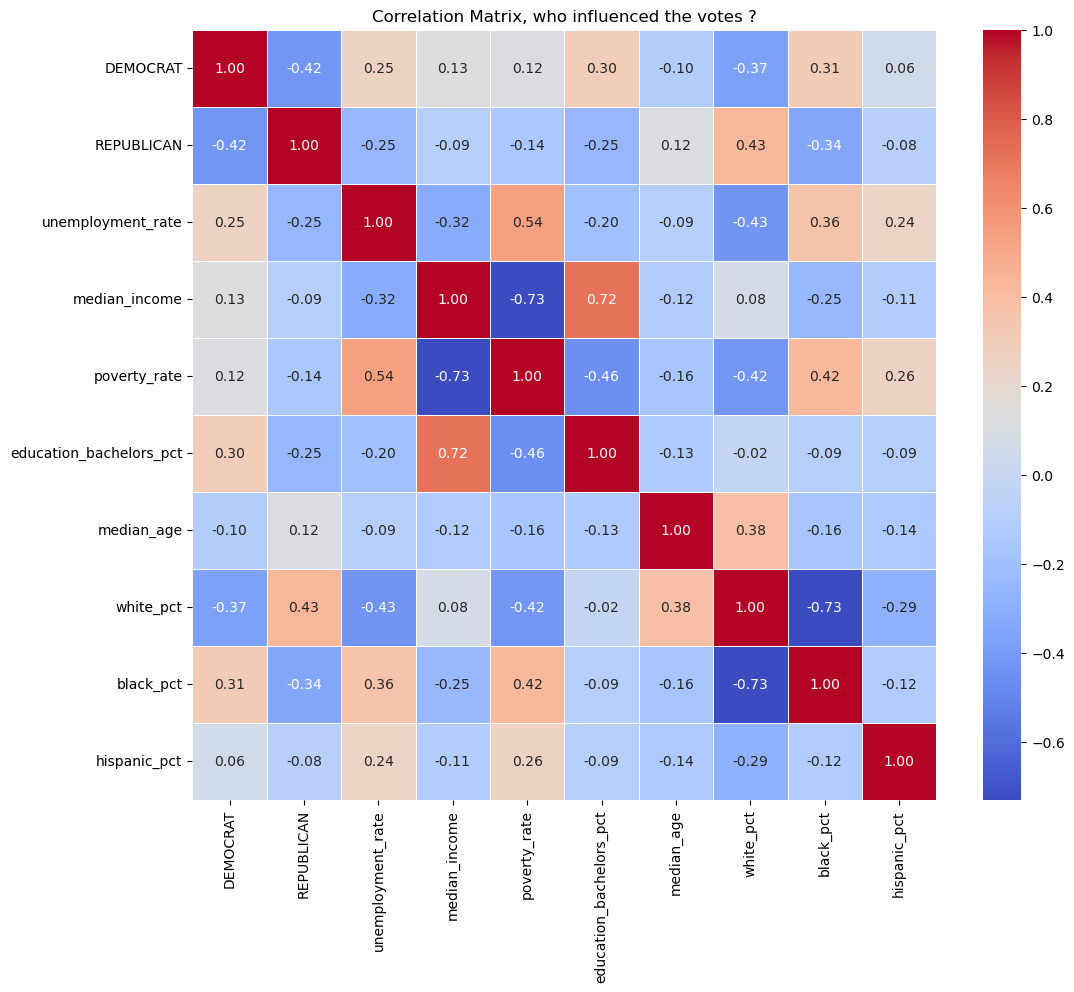

In [4]:
# ==========================================
# STEP 3: CORRELATION MATRIX (Le plus important)
# ==========================================
# On veut voir qui est "ami" avec qui.
# On sélectionne les colonnes numériques intéressantes
cols_to_analyze = [
    'DEMOCRAT', 'REPUBLICAN', 
    'unemployment_rate', 'median_income', 'poverty_rate', 
    'education_bachelors_pct', 
    'median_age', 'white_pct', 'black_pct', 'hispanic_pct'
]

# Calcul de la matrice de corrélation
corr_matrix = df[cols_to_analyze].corr()

# Affichage visuel (Heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix, who influenced the votes ?")
plt.show()

# 💡 Comment lire ça :
# - Rouge foncé (+1) : Quand l'un monte, l'autre monte (ex: Education et Democrat ?)
# - Bleu foncé (-1) : Quand l'un monte, l'autre descend.
# - 0 : Aucun lien.



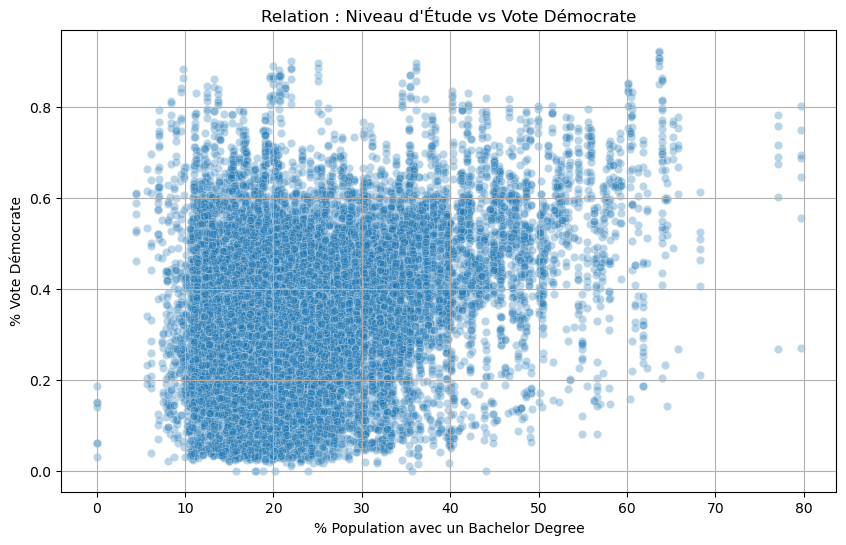

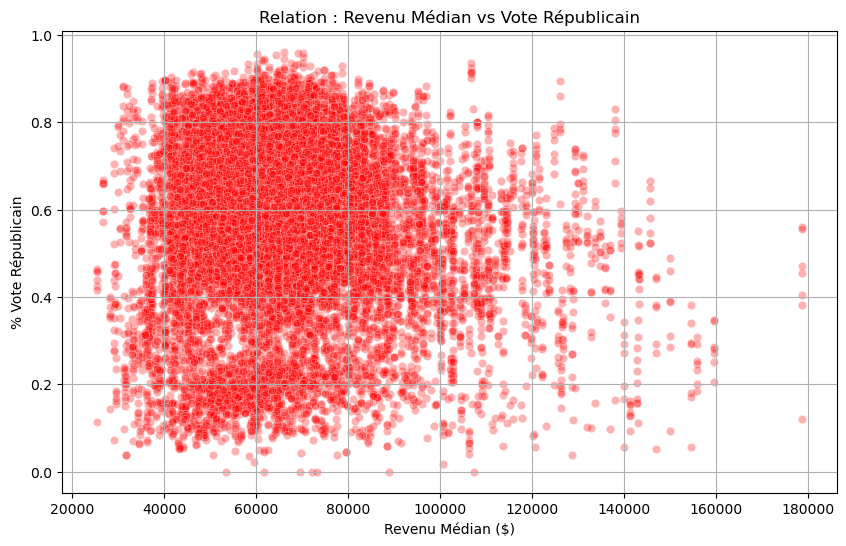

In [5]:
# ==========================================
# STEP 4: SCATTER PLOTS (Nuages de points)
# ==========================================
# On va visualiser la relation la plus célèbre : Éducation vs Vote Démocrate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='education_bachelors_pct', y='DEMOCRAT', alpha=0.3)
plt.title("Relation : Niveau d'Étude vs Vote Démocrate")
plt.xlabel("% Population avec un Bachelor Degree")
plt.ylabel("% Vote Démocrate")
plt.grid(True)
plt.show()

# Une autre relation intéressante : Revenu vs Vote Républicain
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='median_income', y='REPUBLICAN', color='red', alpha=0.3)
plt.title("Relation : Revenu Médian vs Vote Républicain")
plt.xlabel("Revenu Médian ($)")
plt.ylabel("% Vote Républicain")
plt.grid(True)
plt.show()



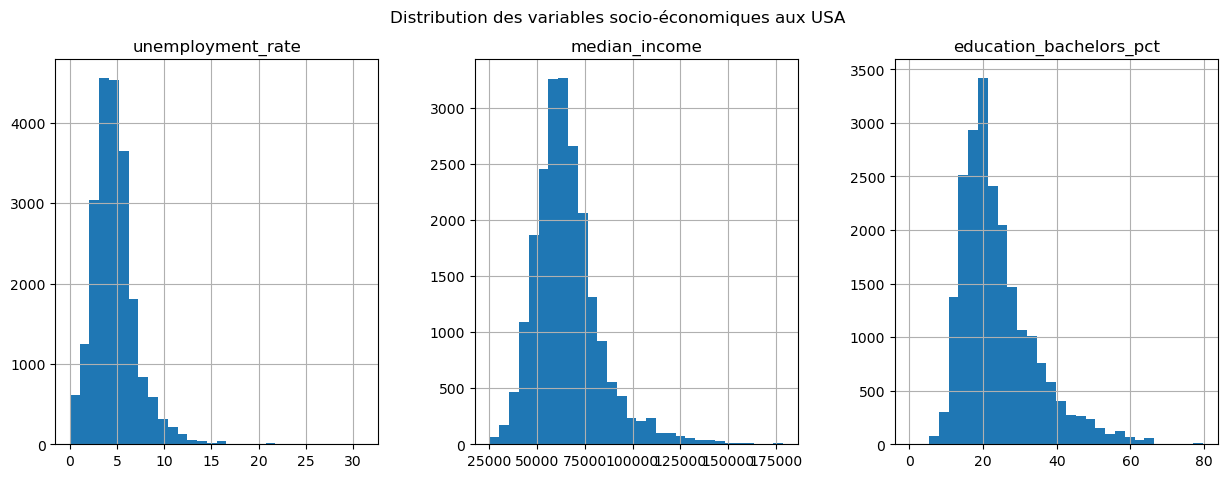

In [6]:
# ==========================================
# STEP 5: DISTRIBUTIONS (Histogrammes)
# ==========================================
# À quoi ressemblent les comtés américains ?
df[['unemployment_rate', 'median_income', 'education_bachelors_pct']].hist(bins=30, figsize=(15, 5), layout=(1,3))
plt.suptitle("Distribution des variables socio-économiques aux USA")
plt.show()

Application du K-Means -> [Ici tu insères ton code de modélisation K-Means que tu as déjà fait tourner].

test de combien de Clusters 

In [7]:
print(list(df.columns))

['year', 'state_po', 'county_name', 'fips', 'DEMOCRAT', 'REPUBLICAN', 'unemployment_rate', 'median_income', 'poverty_rate', 'public_workers_pct', 'education_bachelors_pct', 'median_age', 'white_pct', 'black_pct', 'hispanic_pct']


Calcul des clusters en cours... Terminé !


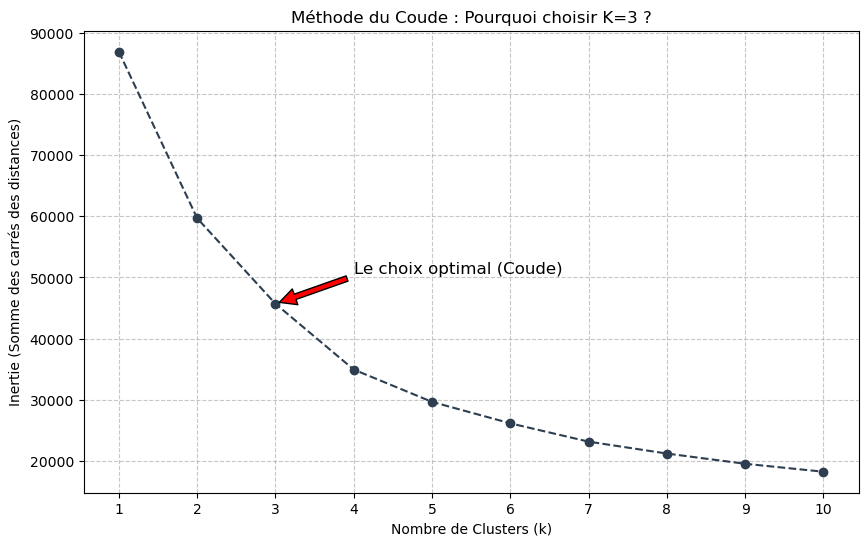

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. ON RECHARGE LES DONNÉES ORIGINALES (Le fichier complet)
# Je reprends le chemin que tu m'as donné tout à l'heure
file_path = "/Users/jessicabourdouxhe/Desktop/Master 1/Data/Projet /elections-nlp-project/data/processed/master_table_elections.csv"
df_raw = pd.read_csv(file_path, dtype={'fips': str})

# 2. SÉLECTION ET PRÉPARATION
# On utilise les noms exacts qui sont dans ton fichier original
features = ['median_income', 'education_bachelors_pct', 'DEMOCRAT', 'REPUBLICAN']

# On nettoie les données (on enlève les lignes vides)
X = df_raw[features].dropna()

# 3. SCALING (Mise à l'échelle)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. CALCUL DU COUDE (Elbow Method)
inertia = []
K_range = range(1, 11)

print("Calcul des clusters en cours...", end=" ")
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
print("Terminé !")

# 5. AFFICHAGE DU GRAPHIQUE
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='#2c3e50')
plt.title('Méthode du Coude : Pourquoi choisir K=3 ?')
plt.xlabel('Nombre de Clusters (k)')
plt.ylabel('Inertie (Somme des carrés des distances)')
plt.xticks(K_range)
plt.grid(True, linestyle='--', alpha=0.7)

# Flèche explicative
plt.annotate('Le choix optimal (Coude)', xy=(3, inertia[2]), xytext=(4, inertia[2]+5000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12)

plt.show()

Justification : "Bien que l'inertie continue de baisser légèrement à K=4, la cassure la plus significative dans la variance expliquée se produit à K=3. Au-delà, le gain de précision ne justifie pas la complexité ajoutée d'un quatrième groupe."
Garde K=3. C'est le choix stratégique. Un modèle à 3 groupes qui raconte une histoire forte vaut mieux qu'un modèle à 4 groupes où le 4ème groupe est flou ("un peu moins riche que le groupe 1 mais plus que le 2...").

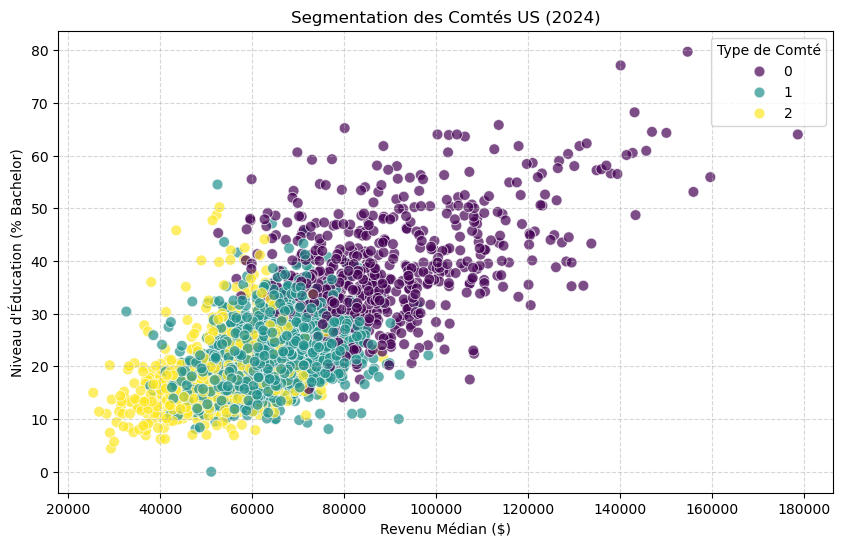


🔍 PROFIL DES 3 GROUPES DE COMTÉS (Moyennes) :
         unemployment_rate  median_income  education_bachelors_pct  white_pct  \
Cluster                                                                         
0                 4.130313   89597.873147                38.615321  73.320758   
1                 3.951682   63917.147912                21.657425  87.651334   
2                 6.885363   51547.259067                17.844560  59.825777   

         median_age  poverty_rate  DEMOCRAT  REPUBLICAN  
Cluster                                                  
0         38.725371      9.806755  0.387343    0.439471  
1         43.920650     12.740719  0.216549    0.614097  
2         39.348446     21.216321  0.244398    0.420900  


In [9]:
# ==========================================
# STEP 6: UNSUPERVISED LEARNING (K-MEANS CLUSTERING)
# Consigne : "One more elaborated figure... unsupervised learning"
# ==========================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. On filtre sur 2024 (pour avoir une photo actuelle)
df_cluster = df[df['year'] == 2024].copy()

# 2. On choisit les variables pour définir le "profil" d'un comté
# On NE met PAS les résultats de vote (DEM/REP), juste la socio-éco
features = ['unemployment_rate', 'median_income', 'education_bachelors_pct', 
            'white_pct', 'median_age', 'poverty_rate']

# 3. On nettoie les données (suppression des lignes vides pour le clustering)
df_cluster = df_cluster.dropna(subset=features)

# 4. Standardisation (Mettre tout à la même échelle pour que le revenu n'écrase pas le reste)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[features])

# 5. Application du K-Means (3 profils types)
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# 6. Visualisation des Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster, 
    x='median_income', 
    y='education_bachelors_pct', 
    hue='Cluster', 
    palette='viridis',
    s=60, alpha=0.7
)
plt.title("Segmentation des Comtés US (2024)")
plt.xlabel("Revenu Médian ($)")
plt.ylabel("Niveau d'Éducation (% Bachelor)")
plt.legend(title='Type de Comté')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 7. Analyse des Clusters (Avec DEMOCRATE et REPUBLICAN)
# C'est ici que j'ai corrigé ta ligne :
cols_to_show = features + ['DEMOCRAT', 'REPUBLICAN']
print("\n🔍 PROFIL DES 3 GROUPES DE COMTÉS (Moyennes) :")
print(df_cluster.groupby('Cluster')[cols_to_show].mean())

avec poids pour les ≠ régions 

Colonnes brutes détectées : ['GEO_ID', 'NAME', 'DP05_0001E']
✅ Données prêtes et fusionnées : 3105 comtés.


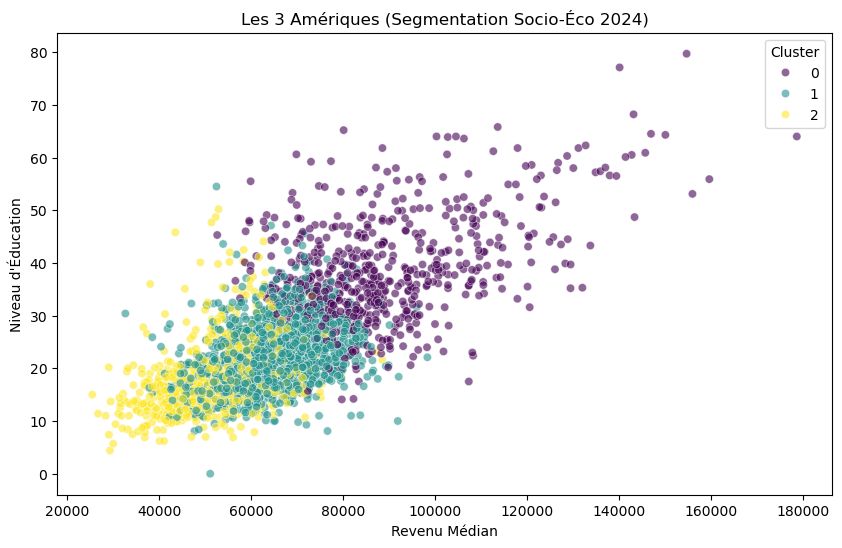


📊 RÉSULTATS DU CLUSTERING (Pondérés par la population) :
   Cluster  Population_Totale  Revenu_Median  Education_Bach  \
0        0          203392119   89597.873147       38.615321   
1        1           66620711   63917.147912       21.657425   
2        2           58924129   51547.259067       17.844560   

   VOTE_DEM_PONDERE  VOTE_REP_PONDERE  
0          0.460928          0.357943  
1          0.266544          0.551135  
2          0.331386          0.337047  


In [10]:
# ==========================================
# STEP 6: ADVANCED UNSUPERVISED LEARNING (WEIGHTED CLUSTERING)
# ==========================================
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chargement ROBUSTE des données de population
# On essaie de charger le fichier où qu'il soit
try:
    # On lit le fichier sans se soucier des headers pour l'instant
    df_pop = pd.read_csv("/Users/jessicabourdouxhe/Desktop/Master 1/Data/Projet /elections-nlp-project/data/raw/socio-economic/DP05_demo.csv", dtype=str, header=0)
except FileNotFoundError:
    df_pop = pd.read_csv("/Users/jessicabourdouxhe/Desktop/Master 1/Data/Projet /elections-nlp-project/data/raw/socio-economic/DP05_demo.csv", dtype=str, header=0)

# --- FIX INFAILLIBLE ---
# Au lieu de chercher le nom "DP05_0001E" qui plante, on prend les colonnes par leur position.
# Dans ces fichiers : Col 0 = GEO_ID, Col 2 = Population Totale
print(f"Colonnes brutes détectées : {df_pop.columns.tolist()[:3]}")

# On ne garde que la colonne 0 (ID) et la colonne 2 (Population)
df_pop = df_pop.iloc[:, [0, 2]]
# On les renomme manuellement pour être sûr à 100%
df_pop.columns = ['GEO_ID', 'population']

# Nettoyage des données
# On enlève la ligne de description (souvent la ligne 1 qui contient "Estimate!!...")
df_pop['population'] = pd.to_numeric(df_pop['population'], errors='coerce')
df_pop = df_pop.dropna(subset=['population']) # Supprime les lignes qui n'ont pas de chiffre

# Extraction du FIPS (On garde ce qui est après 'US')
def extract_fips(geo_id):
    try:
        if pd.isna(geo_id): return None
        return str(geo_id).split('US')[1]
    except:
        return None

df_pop['fips'] = df_pop['GEO_ID'].apply(extract_fips)
df_pop = df_pop[['fips', 'population']].dropna()

# 2. Fusion avec les données 2024
df_2024 = df[df['year'] == 2024].copy()
df_merged = pd.merge(df_2024, df_pop, on='fips', how='inner')

print(f"✅ Données prêtes et fusionnées : {df_merged.shape[0]} comtés.")

# 3. Clustering K-Means (La suite est identique)
features = ['unemployment_rate', 'median_income', 'education_bachelors_pct', 
            'white_pct', 'median_age', 'poverty_rate']

df_cluster = df_merged.dropna(subset=features + ['population']).copy()

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[features])

# Création des 3 Clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='median_income', y='education_bachelors_pct', hue='Cluster', palette='viridis', alpha=0.6)
plt.title("Les 3 Amériques (Segmentation Socio-Éco 2024)")
plt.xlabel("Revenu Médian")
plt.ylabel("Niveau d'Éducation")
plt.show()

# 4. CALCUL DES MOYENNES PONDÉRÉES
def weighted_mean(x, weights):
    return np.average(x, weights=weights)

results = []
for cluster in sorted(df_cluster['Cluster'].unique()):
    c_data = df_cluster[df_cluster['Cluster'] == cluster]
    
    results.append({
        'Cluster': cluster,
        'Population_Totale': int(c_data['population'].sum()),
        'Revenu_Median': c_data['median_income'].mean(),
        'Education_Bach': c_data['education_bachelors_pct'].mean(),
        '%_Blanc': c_data['white_pct'].mean(),
        # Moyennes pondérées pour le vote
        'VOTE_DEM_PONDERE': weighted_mean(c_data['DEMOCRAT'], c_data['population']),
        'VOTE_REP_PONDERE': weighted_mean(c_data['REPUBLICAN'], c_data['population'])
    })

# Affichage du tableau final
res_df = pd.DataFrame(results)
print("\n📊 RÉSULTATS DU CLUSTERING (Pondérés par la population) :")
print(res_df[['Cluster', 'Population_Totale', 'Revenu_Median', 'Education_Bach', 'VOTE_DEM_PONDERE', 'VOTE_REP_PONDERE']])

Visualisation des Clusters (Le Nouveau Code) -> C'est ici que tu colles le code des graphiques (Bulles + Barres) que je t'ai donné tout à l'heure.

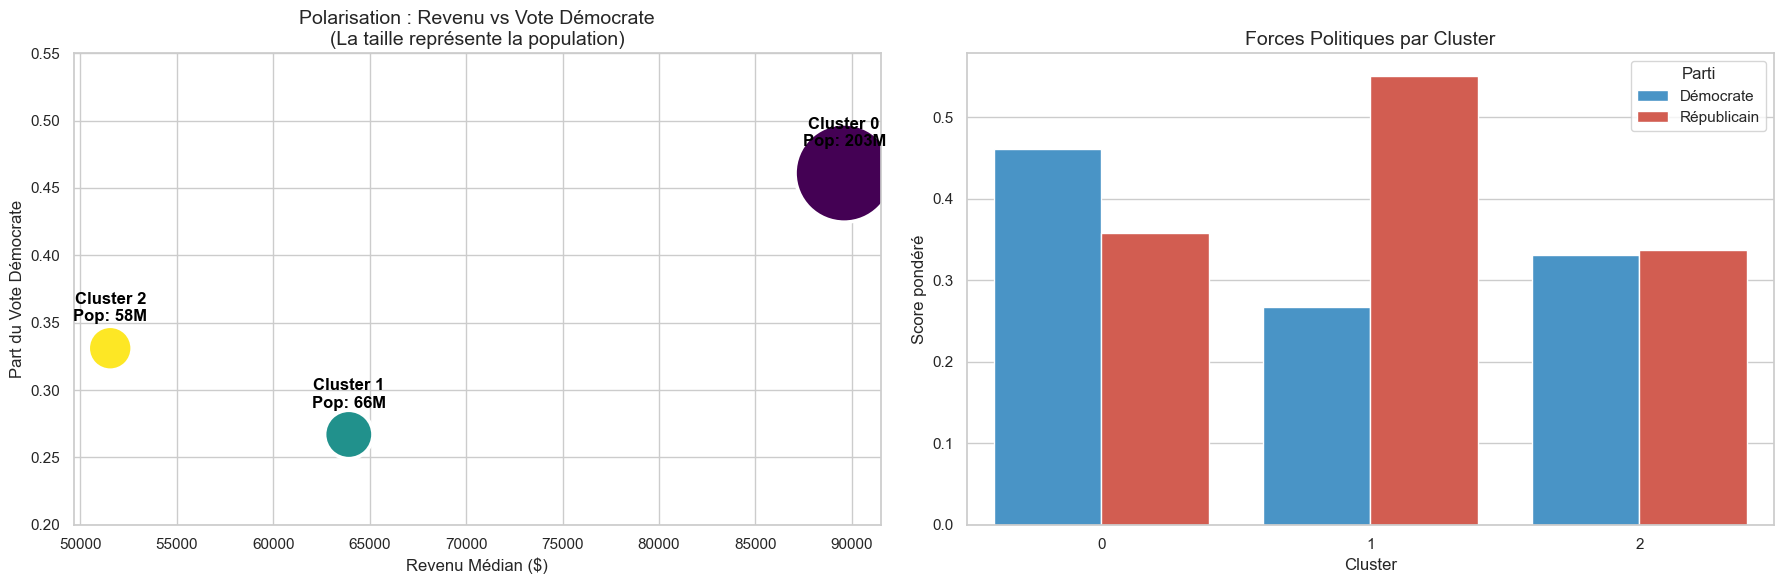

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Création des données 
data = {
    'Cluster': [0, 1, 2],
    'Population': [203392119, 66620711, 58924129],
    'Revenu_Median': [89597.87, 63917.15, 51547.26],
    'Education_Bach': [38.62, 21.66, 17.84],
    'Vote_Dem': [0.461, 0.267, 0.331],  # Vote Démocrate pondéré
    'Vote_Rep': [0.358, 0.551, 0.337]   # Vote Républicain pondéré
}

df = pd.DataFrame(data)

# 2. Configuration du style visuel
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Graphique 1 : Bubble Chart (Gauche) ---
# Montre la relation Revenu / Vote Démocrate, avec la taille des bulles selon la population
sns.scatterplot(
    data=df, 
    x='Revenu_Median', 
    y='Vote_Dem', 
    size='Population', 
    sizes=(1000, 5000), # Taille min et max des bulles
    hue='Cluster', 
    palette='viridis', 
    legend=False,
    ax=axes[0]
)

# Ajout des annotations (Texte sur les bulles)
for i in range(df.shape[0]):
    axes[0].text(
        df.Revenu_Median[i], 
        df.Vote_Dem[i] + 0.02, # Décalage vertical du texte pour lisibilité
        f"Cluster {df.Cluster[i]}\nPop: {int(df.Population[i]/1e6)}M", 
        horizontalalignment='center', 
        size='medium', 
        color='black', 
        weight='bold'
    )

axes[0].set_title('Polarisation : Revenu vs Vote Démocrate\n(La taille représente la population)', fontsize=14)
axes[0].set_xlabel('Revenu Médian ($)', fontsize=12)
axes[0].set_ylabel('Part du Vote Démocrate', fontsize=12)
axes[0].set_ylim(0.2, 0.55) # Ajustement pour bien cadrer

# --- Graphique 2 : Bar Chart Comparatif (Droite) ---
# Transforme les données pour avoir une colonne "Parti" et une colonne "Score" (format long)
df_melted = df.melt(id_vars=['Cluster'], value_vars=['Vote_Dem', 'Vote_Rep'], var_name='Parti', value_name='Score')
df_melted['Parti'] = df_melted['Parti'].replace({'Vote_Dem': 'Démocrate', 'Vote_Rep': 'Républicain'})

sns.barplot(
    data=df_melted,
    x='Cluster',
    y='Score',
    hue='Parti',
    palette={'Démocrate': '#3498db', 'Républicain': '#e74c3c'}, # Bleu et Rouge classiques
    ax=axes[1]
)

axes[1].set_title('Forces Politiques par Cluster', fontsize=14)
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Score pondéré', fontsize=12)
axes[1].legend(title='Parti')

# Affichage
plt.tight_layout()
plt.show()

bonus : Visualisation des Clusters (Le Nouveau Code) -> C'est ici que tu colles le code des graphiques (Bulles + Barres) que je t'ai donné tout à l'heure.

   Cluster  Engagement_Politique  Marge_Victoire
0        0                 0.819           0.103
1        1                 0.818          -0.284
2        2                 0.668          -0.006


/var/folders/q7/2bt1kt6d0xzb95k0cn4jftsr0000gn/T/ipykernel_22912/403609467.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Marge_Victoire', data=df, palette='coolwarm')


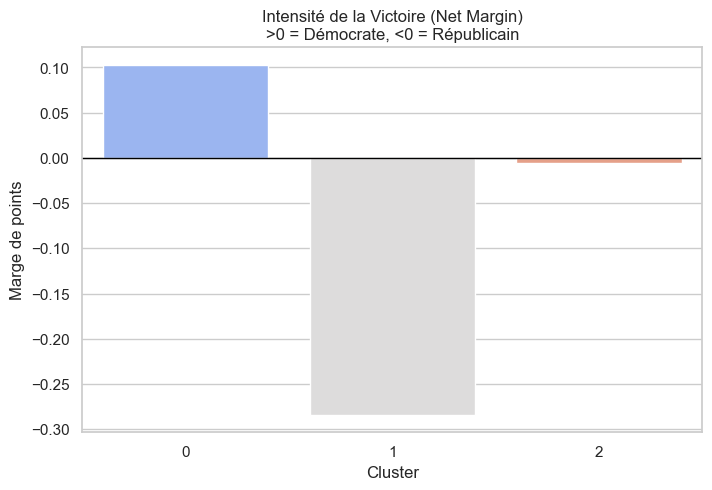

In [12]:
# On reprend le dataframe 'df' créé précédemment

# 1. Calcul de l'engagement (Somme des votes majeurs)
df['Engagement_Politique'] = df['Vote_Dem'] + df['Vote_Rep']

# 2. Calcul de la Marge (Positif = Bleu, Négatif = Rouge)
df['Marge_Victoire'] = df['Vote_Dem'] - df['Vote_Rep']

# 3. Affichage du tableau enrichi pour ton rapport
print(df[['Cluster', 'Engagement_Politique', 'Marge_Victoire']])

# --- Pistes de Visualisation supplémentaire ---

# Tu pourrais faire un Barplot de la "Marge de Victoire"
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Marge_Victoire', data=df, palette='coolwarm')
plt.axhline(0, color='black', linewidth=1) # Ligne médiane
plt.title("Intensité de la Victoire (Net Margin)\n>0 = Démocrate, <0 = Républicain")
plt.ylabel("Marge de points")
plt.show()